In [69]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [71]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [73]:
data.rename(columns={"#Passengers":"passengers"}, inplace=True)

data = data["passengers"]

In [75]:
type(data)

pandas.core.series.Series

In [77]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [78]:
data = np.array(data).reshape(-1,1)

In [79]:
type(data)

numpy.ndarray

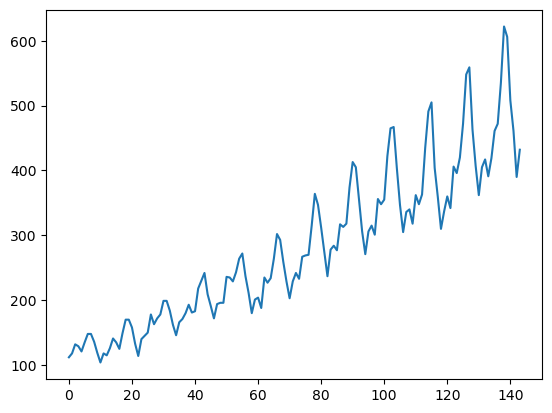

In [83]:
plt.plot(data)
plt.show()

In [84]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [85]:
len(data)

144

In [86]:
train = data[0:100,:]
test = data[100:,:]

In [87]:
def get_data(data, steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX), np.array(dataY)

In [90]:
steps = 2

In [94]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

In [96]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [97]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps))) # first hidden layer with 128 memory blocks
model.add(Dense(64)) # second hidden layer with 64 memory blocks
model.add(Dense(1)) # output layer
model.compile(loss = "mean_squared_error", optimizer = "adam")

D:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          67,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,393 (294.50 KB)

 Trainable params: 75,393 (294.50 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
#train
model.fit(X_train, y_train, epochs=25, batch_size = 1)

Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0185
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.0041
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0027 
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0029
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0032
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022  
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0043
Epoch 9/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0027
Epoch 10/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0033 
Epoch 11/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0025
Epoch 12/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.0027    
Epoch 13/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0021
Epoch 14/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029
Epoch 15/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [103]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


In [105]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

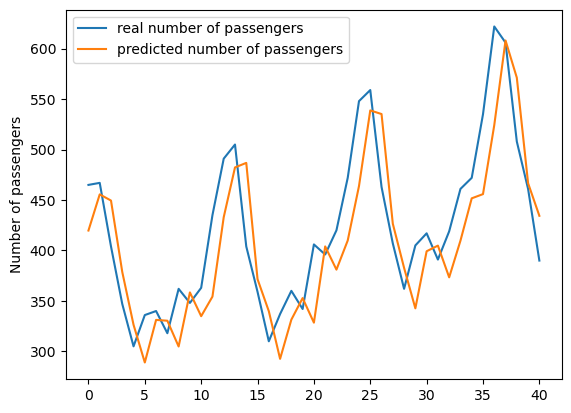

In [106]:
plt.plot(y_test, label="real number of passengers")
plt.plot(y_pred, label ="predicted number of passengers")
plt.ylabel("Months")
plt.ylabel("Number of passengers")
plt.legend()
plt.show()